In [73]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

base_path = '/kaggle/input/nitro-language-processing-2'

In [4]:
train_df = pd.read_csv(f'{base_path}/train_data.csv')

In [13]:
train_df.groupby('Final Labels').count()

,Text,Id
Final Labels,,
descriptive,1494,1494
direct,2156,2156
non-offensive,30838,30838
offensive,4301,4301
reporting,219,219


<AxesSubplot:>

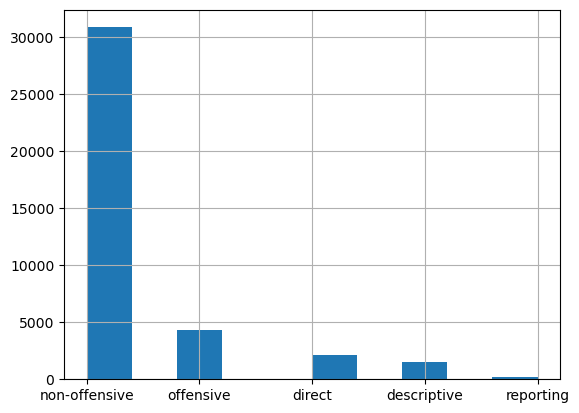

In [80]:
train_df['Final Labels'].hist()

In [102]:
(train_df['Text'].str.len() > 400).sum()

33

In [48]:
# see last page in paper https://github.com/DianaHoefels/CoRoSeOf
offensive_words_paper = {
    'pula': 1282,
    'coaie': 238,
    'bag': 193,
    'cur': 192,
    'prost': 132,
    'drac': 125,
    'plm': 91,
    'taci': 64,
    'morti': 50,
    'muie': 47,
    'sex': 46,
    'fute': 39,
    'pizda': 40,
    'dumnezeu': 33,
    'cringe': 30,
    'gay': 27,
    'mamă': 27,
    'evrei': 42,
    'lucifer': 23,
    'ticălos': 21,
    'mizerie': 18,
    'tradator': 16,
    'mincinos': 16,
    'covid': 13
}

offensive_words_paper = dict(sorted(offensive_words_paper.items(), key=lambda item: -item[1]))

['pula', 'coaie', 'bag', 'cur', 'prost']

In [82]:
len(train_df['offensive_label'])

39008

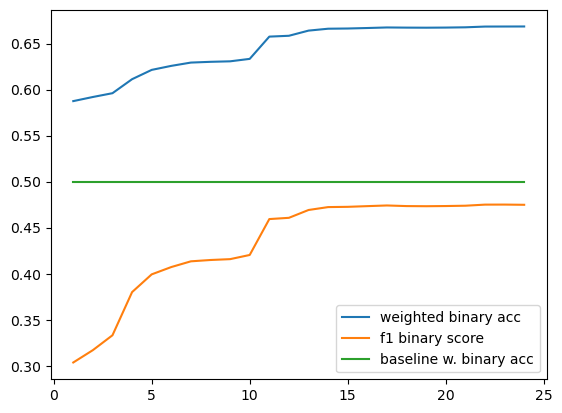

In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score

i_range = range(1, len(offensive_words_paper) + 1)
wacc_list = []
wacc_majority_list = []
f1_list = []

train_df['offensive_label'] = train_df['Final Labels'] != 'non-offensive'

for i in i_range:
    top_i_offensive_words = '|'.join(list(offensive_words_paper.keys())[:i])
    train_df['has_offensive_word'] = train_df['Text'].str.contains(top_i_offensive_words)

    wacc = balanced_accuracy_score(train_df['offensive_label'], train_df['has_offensive_word'])
    f1 = f1_score(train_df['offensive_label'], train_df['has_offensive_word'])
    
    wacc_list.append(wacc)
    f1_list.append(f1)
    wacc_majority_list.append(balanced_accuracy_score(train_df['offensive_label'], np.full(len(train_df['offensive_label']), False)))
    
plt.plot(i_range, wacc_list, label='weighted binary acc')
plt.plot(i_range, f1_list, label='f1 binary score')
plt.plot(i_range, wacc_majority_list, label='baseline w. binary acc')
plt.legend()

In [1]:
reporting_df_full = train_df[train_df["Final Labels"] == "descriptive"]
reporting_df = reporting_df_full[["Text"]]
reporting_df['word_count'] = reporting_df['Text'].apply(lambda x: len(x.split()))
reporting_df["Text"][0:50].tolist()
# reporting_df

NameError: name 'train_df' is not defined

In [ ]:
reporting_df["word_count"].mean()

In [2]:
mytest = pd.read_csv("/Users/dom/Documents/Machine Learning/Nitro NLP Hackathon/nitro-lang-processing-2/src/reporting_training_data_augmented-utf8.csv")
mytest

NameError: name 'pd' is not defined

In [3]:
import random

def sliding_window(df, window_size):
    new_rows = []
    for _, row in df.iterrows():
        text = row['Text']
        labels = row['Final Labels']
        words = text.split()
        for i in range(len(words) - window_size + 1):
            new_text = ' '.join(words[i:i+window_size])
            new_labels = labels
            new_id = random.randint(0, 100000)
            new_rows.append({'Text': new_text, 'Final Labels': new_labels, 'Id': new_id})
    return pd.DataFrame(new_rows)

new_df = sliding_window(train_df, 20)
# new_df['Final Labels'].hist()
new_df

NameError: name 'train_df' is not defined